<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#ConvOutput" data-toc-modified-id="ConvOutput-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>ConvOutput</a></span></li><li><span><a href="#MNIST" data-toc-modified-id="MNIST-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>MNIST</a></span></li><li><span><a href="#CIFAR10" data-toc-modified-id="CIFAR10-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>CIFAR10</a></span></li><li><span><a href="#Save-saliency-maps" data-toc-modified-id="Save-saliency-maps-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Save saliency maps</a></span><ul class="toc-item"><li><span><a href="#MNIST" data-toc-modified-id="MNIST-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>MNIST</a></span></li><li><span><a href="#CIFAR10" data-toc-modified-id="CIFAR10-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>CIFAR10</a></span></li></ul></li></ul></div>

In [8]:
import torch

import numpy as np 
import sys
sys.path.append('../code')

from dataload import cifar10_load, mnist_load
from saliency.attribution_methods import ConvOutput
from saliency.ensembles import *
from utils import get_samples
from visualization import visualize_saliencys

import warnings
warnings.filterwarnings('ignore')

In [9]:
original_images_mnist, original_targets_mnist, pre_images_mnist, mnist_classes, mnist_model = get_samples('mnist')

Data Complete
filename:  simple_cnn_mnist
Model Complete


In [10]:
original_images_cifar10, original_targets_cifar10, pre_images_cifar10, cifar10_classes, cifar10_model = get_samples('cifar10')

Files already downloaded and verified
Files already downloaded and verified
Data Complete
filename:  simple_cnn_cifar10
Model Complete


# ConvOutput

In [11]:
CO_mnist = ConvOutput(mnist_model)
CO_cifar10 = ConvOutput(cifar10_model)

# MNIST

In [12]:
# CO
outputs, probs, preds = CO_mnist.generate_image(pre_images_mnist, original_targets_mnist, layer=0)
results = [outputs]
names = ['Conv1','Batch1','ReLU1','MaxPool1','Conv2','Batch2','ReLU2','MaxPool2','Conv3','Batch3','ReLU3','MaxPool3']
for i in range(1,12):
    outputs_i, _, _ = CO_mnist.generate_image(pre_images_mnist, original_targets_mnist, layer=i)
    results.append(outputs_i)

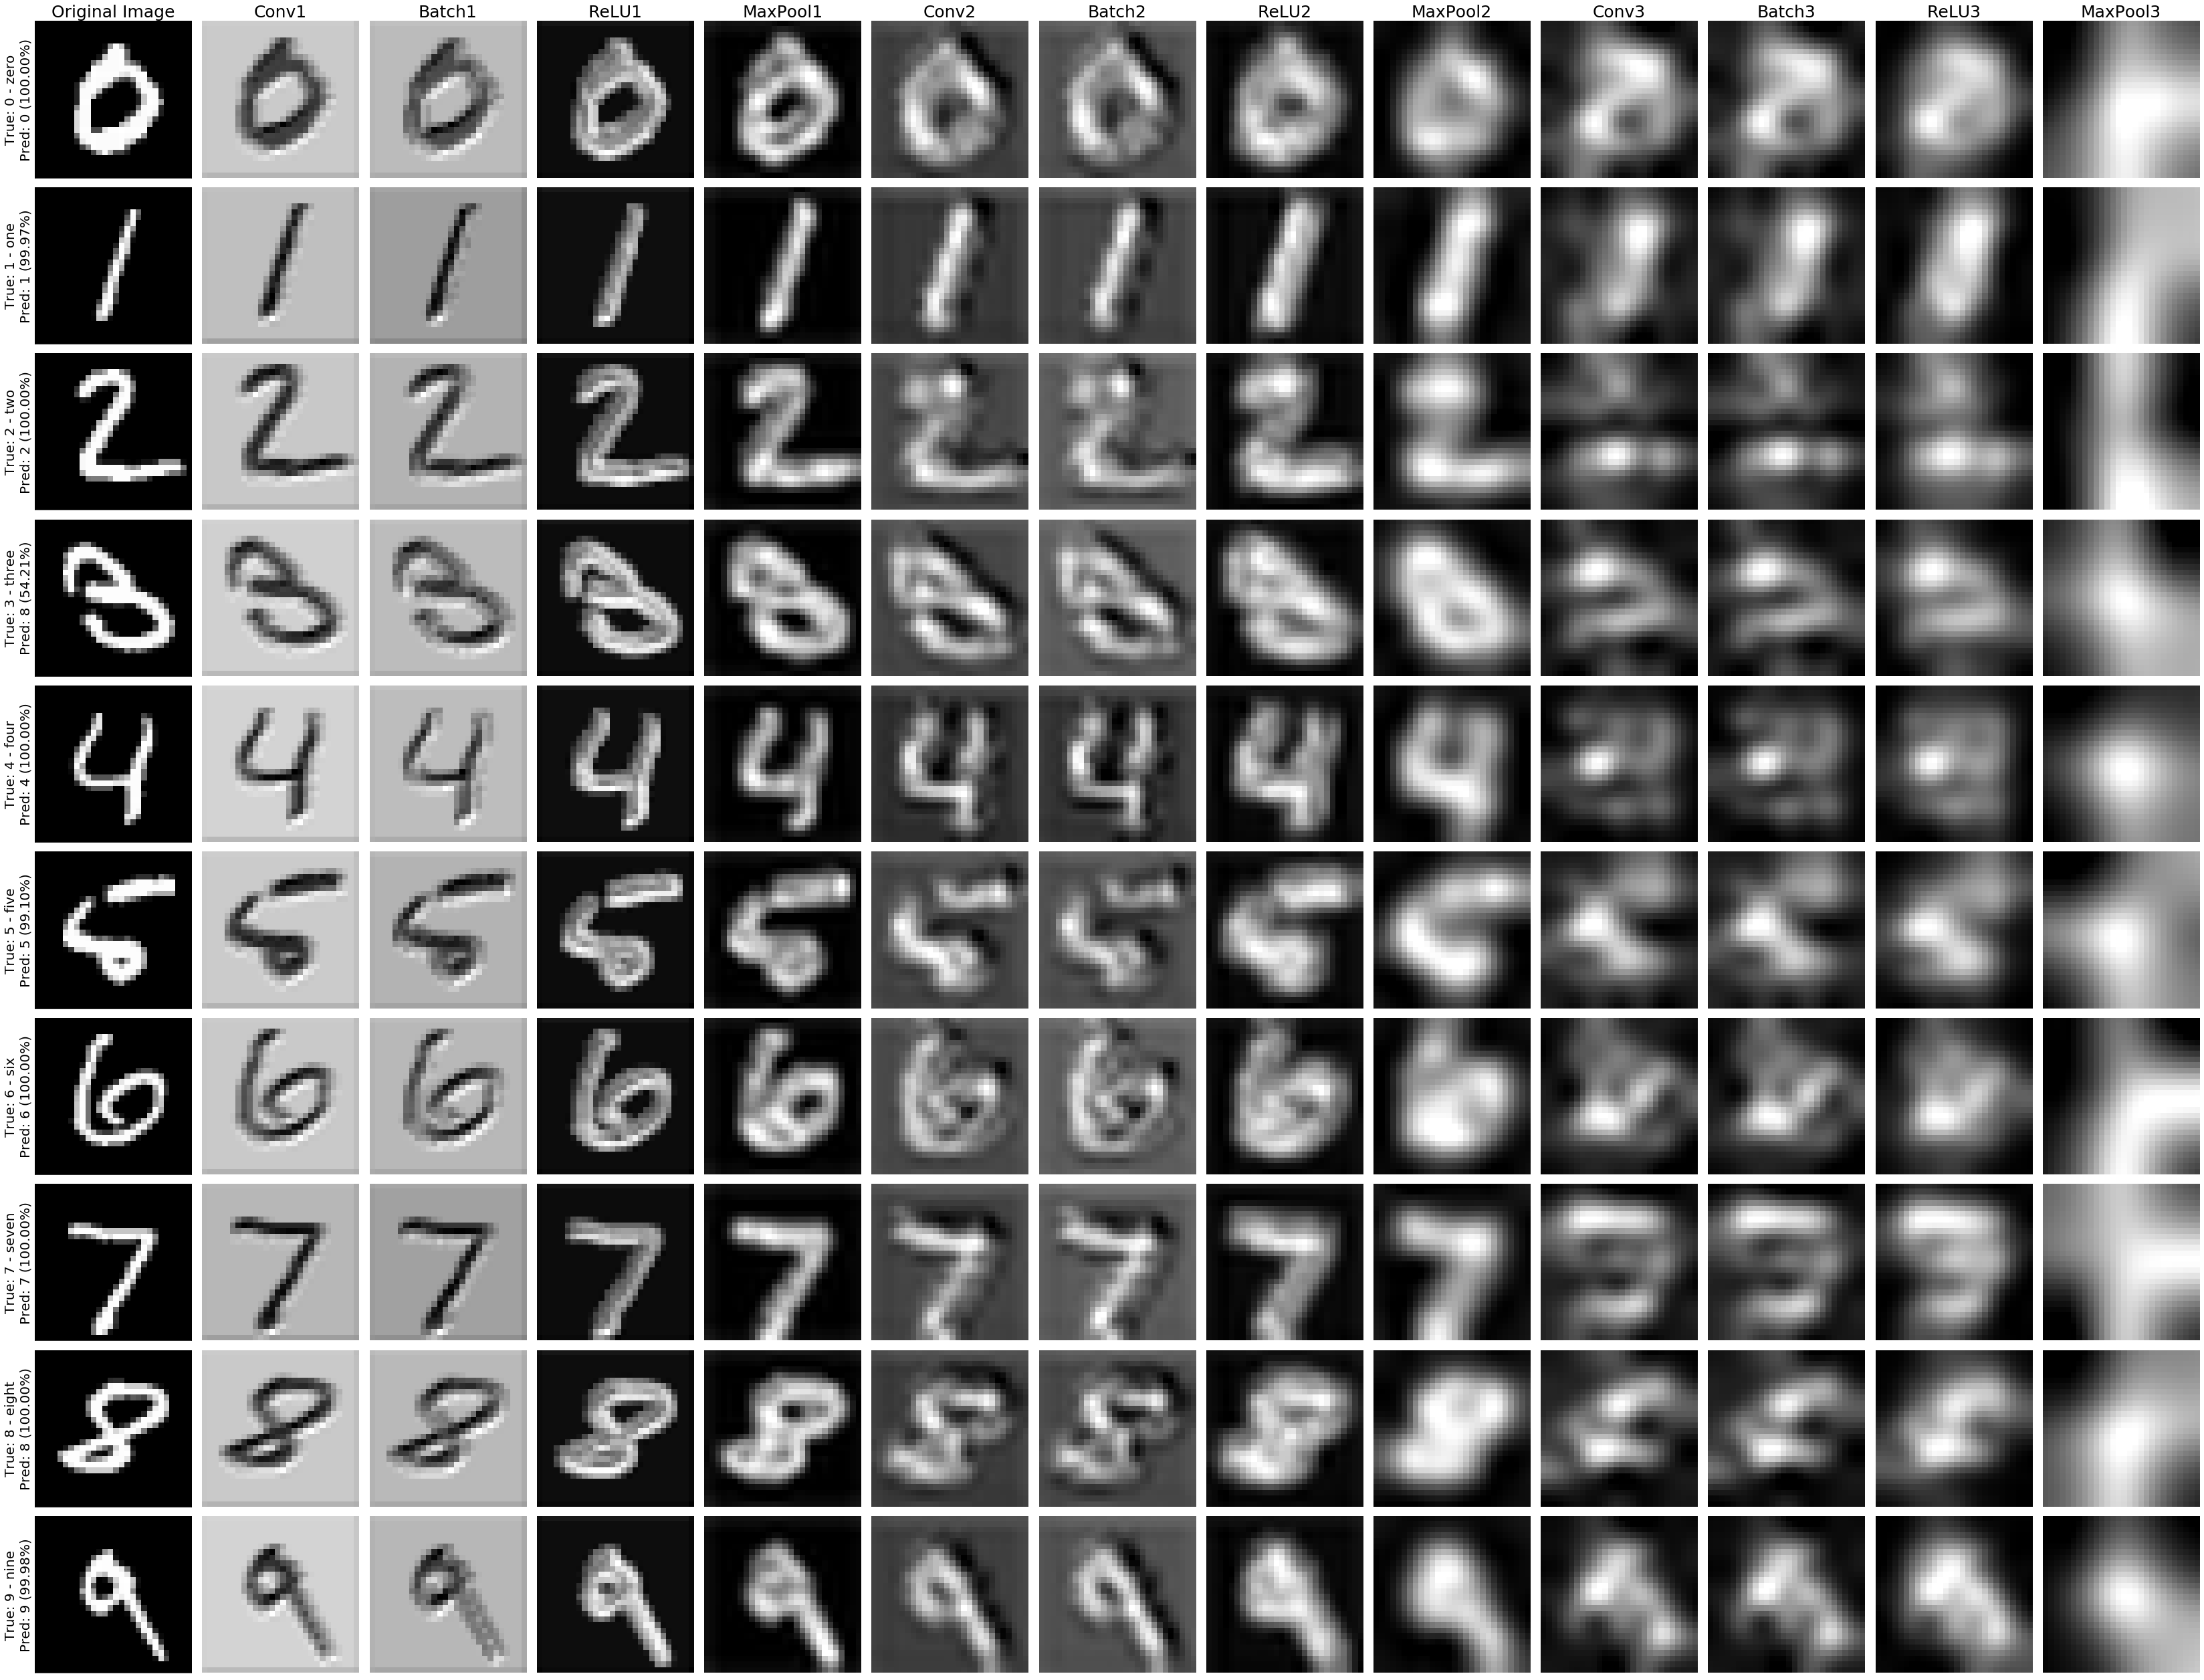

In [13]:
target = 'mnist'

visualize_saliencys(original_images_mnist,
                    results,
                    probs,
                    preds,
                    mnist_classes,
                    names,
                    target,
                    savedir='../images/results/SimpleCNN_CO(mnist).jpg', dpi=150,
                    col=len(results)+1, row=10, size=(len(results)*4,35), labelsize=20, fontsize=25)

# CIFAR10

In [17]:
# CO
outputs, probs, preds = CO_cifar10.generate_image(pre_images_cifar10, original_targets_cifar10, layer=0, color=True)
results = [outputs]
names = ['Conv1','Batch1','ReLU1','MaxPool1','Conv2','Batch2','ReLU2','MaxPool2','Conv3','Batch3','ReLU3','MaxPool3']
for i in range(1,12):
    outputs_i, _, _ = CO_cifar10.generate_image(pre_images_cifar10, original_targets_cifar10, layer=i, color=True)
    outputs_i = (outputs_i*0.5 + original_images_cifar10*0.5).astype(int)
    results.append(outputs_i)

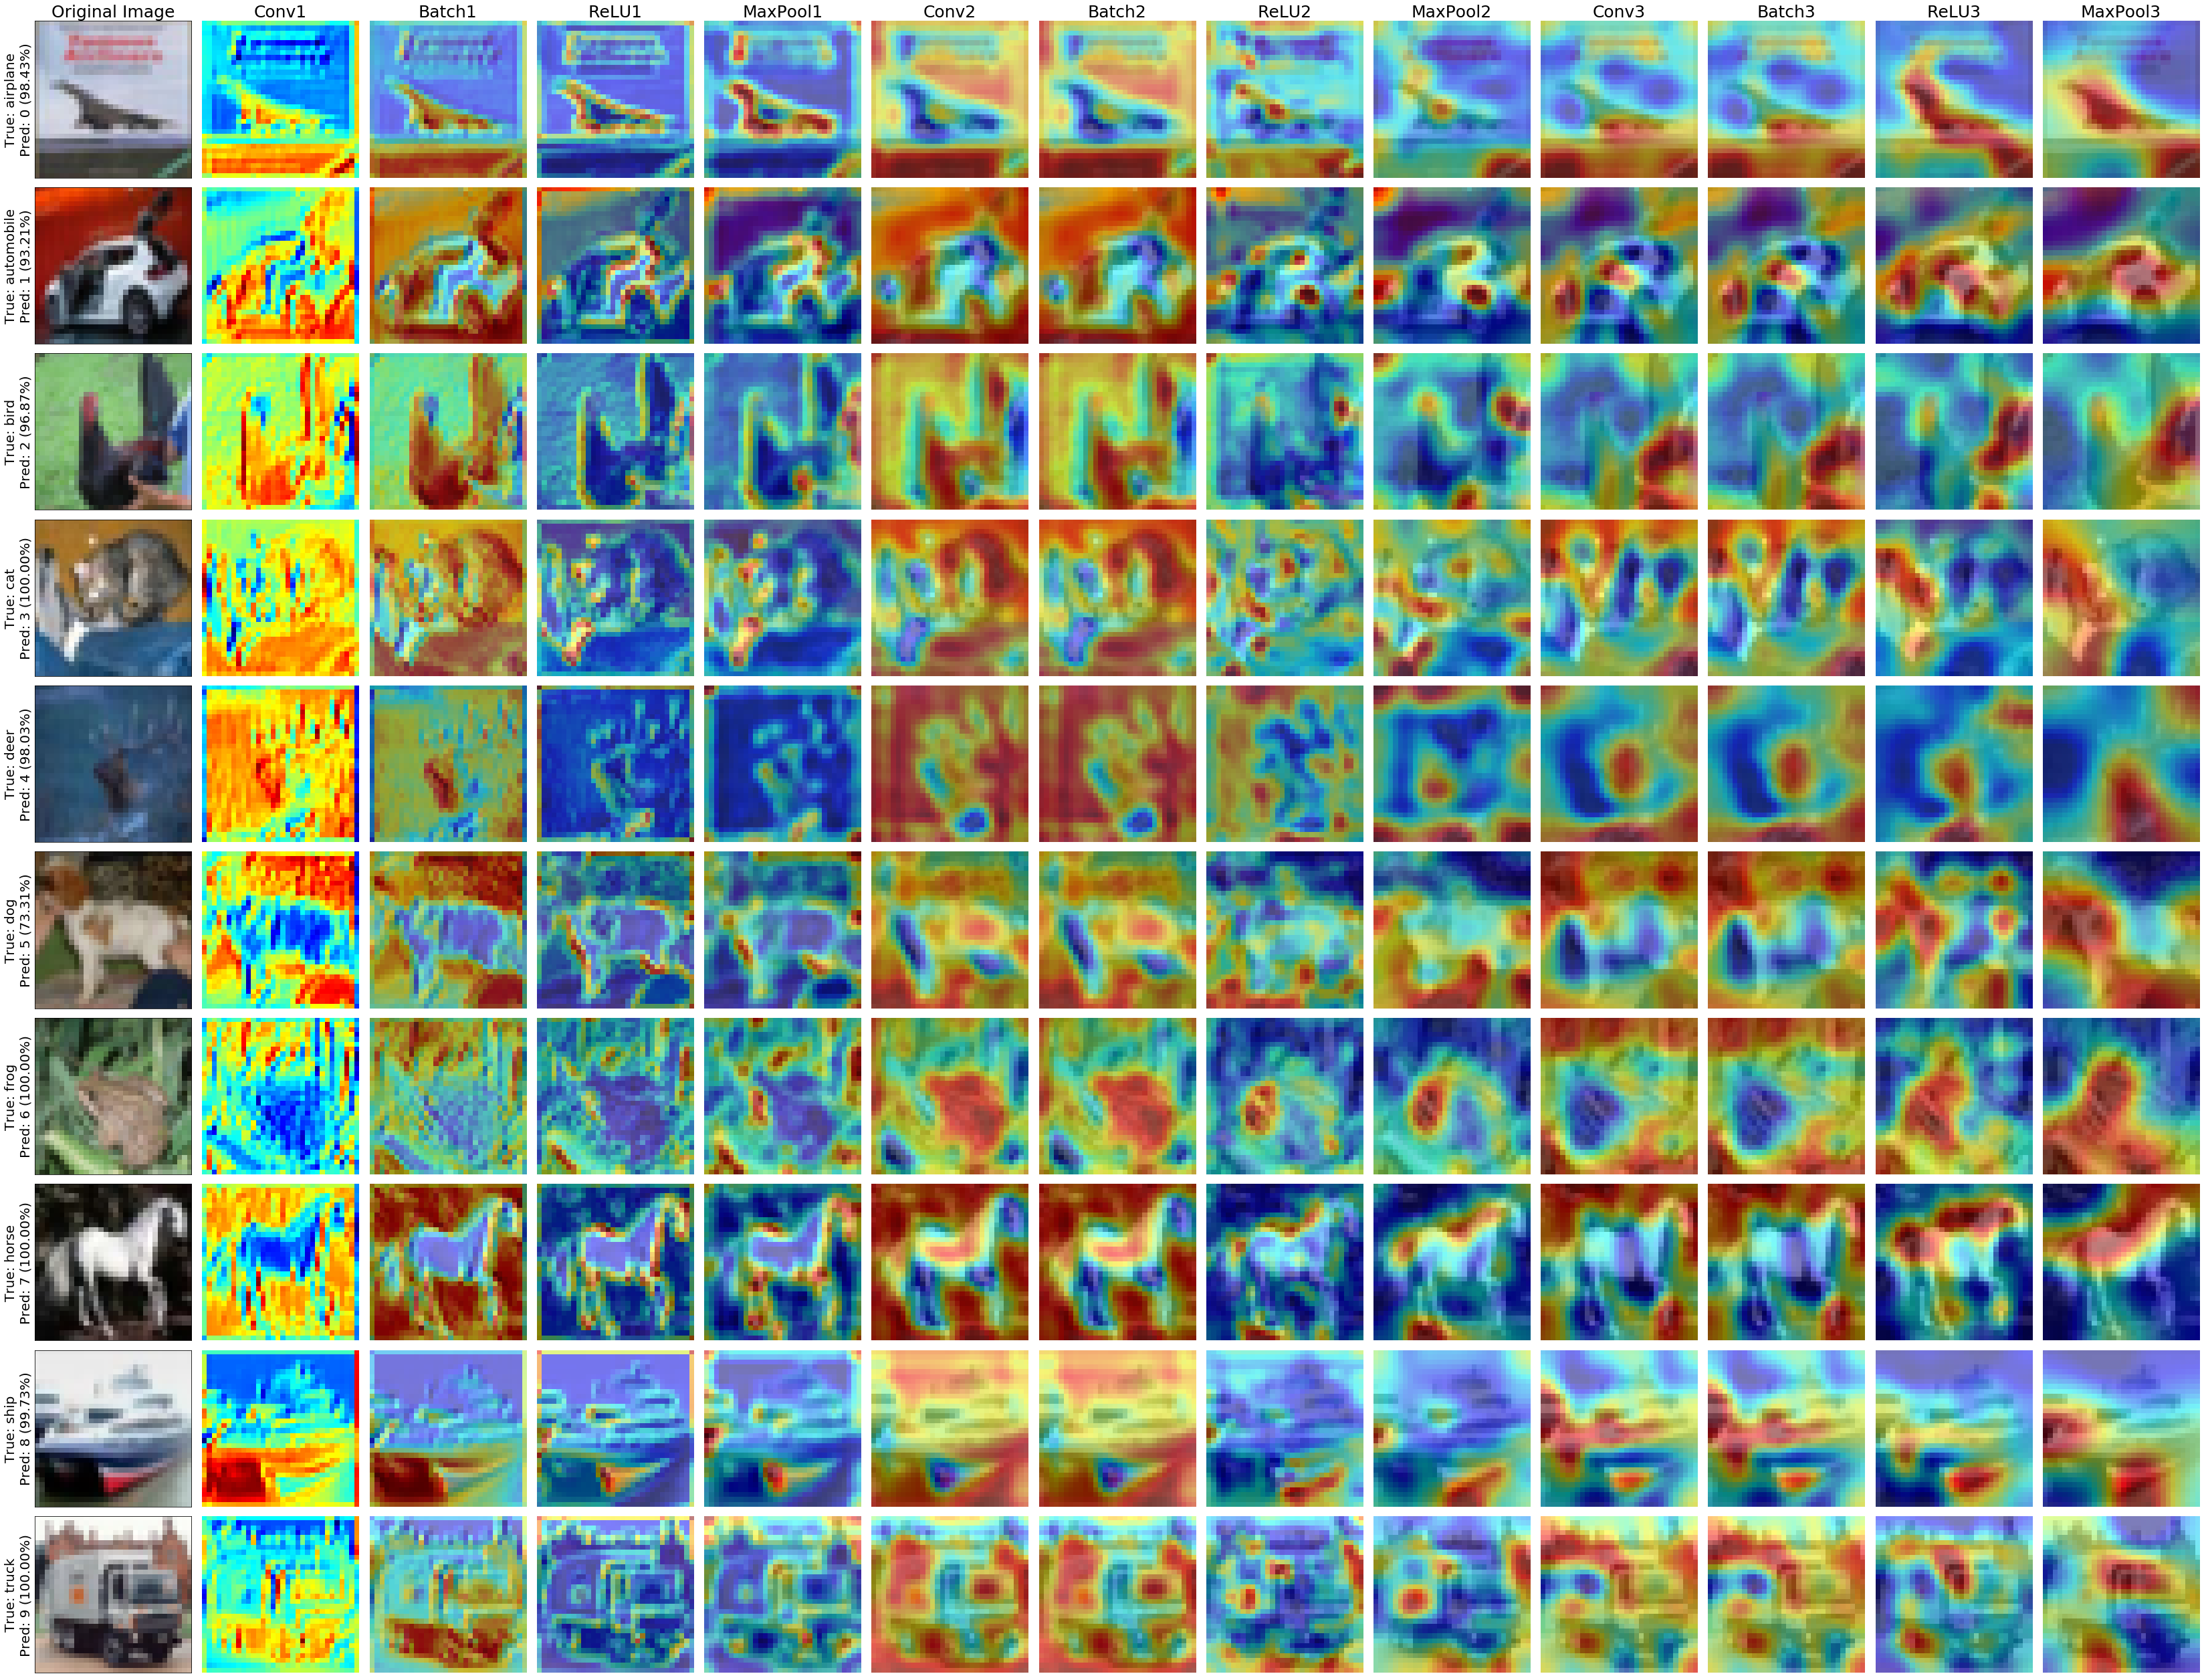

In [18]:
target = 'cifar10'

visualize_saliencys(original_images_cifar10,
                    results,
                    probs,
                    preds,
                    cifar10_classes,
                    names,
                    target,
                    savedir='../images/results/SimpleCNN_CO(cifar10).jpg', dpi=150,
                    col=len(results)+1, row=10, size=(len(results)*4,35), labelsize=20, fontsize=25)

# Save saliency maps

## MNIST

In [19]:
trainloader, validloader, testloader = mnist_load(shuffle=False)

Data Complete


In [21]:
CO_mnist.save(trainloader, '../saliency_maps/[mnist]CO_train.hdf5', layer=11)
CO_mnist.save(validloader, '../saliency_maps/[mnist]CO_valid.hdf5', layer=11)
CO_mnist.save(testloader, '../saliency_maps/[mnist]CO_test.hdf5', layer=11)

ConvOutput:   3%|▎         | 3/94 [00:00<00:03, 28.59it/s]

Save saliency maps


ConvOutput:   4%|▍         | 3/79 [00:00<00:02, 27.43it/s]

Save saliency maps


ConvOutput: 100%|██████████| 79/79 [00:02<00:00, 27.28it/s]

Save saliency maps


## CIFAR10

In [22]:
trainloader, validloader, testloader = cifar10_load(shuffle=False, augmentation=False)

Files already downloaded and verified
Files already downloaded and verified
Data Complete


In [23]:
CO_cifar10.save(trainloader, '../saliency_maps/[cifar10]CO_train.hdf5', color=True, layer=11)
CO_cifar10.save(validloader, '../saliency_maps/[cifar10]CO_valid.hdf5', color=True, layer=11)
CO_cifar10.save(testloader, '../saliency_maps/[cifar10]CO_test.hdf5', color=True, layer=11)

ConvOutput:   3%|▎         | 2/79 [00:00<00:05, 14.58it/s]

Save saliency maps


ConvOutput:   3%|▎         | 2/79 [00:00<00:05, 14.40it/s]

Save saliency maps


ConvOutput: 100%|██████████| 79/79 [00:05<00:00, 13.56it/s]


Save saliency maps
